In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('training_data/250820/test_combined.csv')

In [3]:
dataset.dtypes

Stack Voltage(V)       float64
Stack Current(A)       float64
Stack Temperatur(C)      int64
Istwert Durchfluss     float64
dtype: object

In [4]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [5]:
X

array([[ 0., 27.,  0.],
       [ 0., 27.,  0.],
       [ 0., 27.,  0.],
       ...,
       [ 0., 30.,  0.],
       [ 0., 30.,  0.],
       [ 0., 30.,  0.]])

In [6]:
y

array([19.769231, 19.769231, 19.769231, ..., 18.923077, 18.923077,
       19.      ])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
X_train

array([[ 0.        , 29.        ,  0.        ],
       [ 1.3       , 28.        ,  0.        ],
       [ 1.2       , 27.        ,  0.06672111],
       ...,
       [ 0.5       , 33.        ,  0.        ],
       [ 0.4       , 34.        ,  0.1014856 ],
       [ 0.4       , 32.        ,  0.        ]])

In [9]:
X_test

array([[ 0.3       , 33.        ,  0.        ],
       [ 3.        , 34.        ,  0.        ],
       [ 1.2       , 28.        ,  1.618058  ],
       ...,
       [ 7.3       , 38.        ,  0.        ],
       [ 1.4       , 28.        ,  0.09009045],
       [ 0.5       , 32.        ,  0.        ]])

In [10]:
y_train



array([19.384615, 14.846154, 14.846154, ..., 16.615385, 16.846154,
       16.615385])

In [11]:
y_test

array([16.846154, 14.384615, 14.846154, ..., 12.846154, 14.846154,
       16.615385])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
yscaler = StandardScaler()
y_train = yscaler.fit_transform(y_train.reshape(-1, 1))
y_test= yscaler.transform(y_test.reshape(-1, 1))

In [13]:
X_train

array([[-0.67379645, -0.67435386, -0.34355359],
       [ 0.08655688, -0.97688781, -0.34355359],
       [ 0.02806817, -1.27942177, -0.18257915],
       ...,
       [-0.38135286,  0.53578197, -0.34355359],
       [-0.43984158,  0.83831593, -0.09870473],
       [-0.43984158,  0.23324802, -0.34355359]])

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Dense(4, activation="sigmoid", name="layer1"),
        layers.Dense(4, activation="sigmoid", name="layer2"),
        layers.Dense(4, activation="sigmoid", name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)
model.compile(optimizer="adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [15]:
model.fit(X_train, y_train, batch_size=32, epochs=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
30980/30980 [==============================] - 1s 30us/sample - loss: -5.1162e-08 - acc: 0.0000e+00
Epoch 2/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.1224e-08 - acc: 0.0000e+00
Epoch 3/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4918e-08 - acc: 0.0000e+00
Epoch 4/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.3183e-08 - acc: 0.0000e+00
Epoch 5/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8566e-08 - acc: 0.0000e+00
Epoch 6/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.2768e-08 - acc: 0.0000e+00
Epoch 7/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8658e-08 - acc: 0.0000e+00
Epoch 8/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7534e-08 - acc: 0.0000e+00
Ep

30980/30980 [==============================] - 1s 24us/sample - loss: -6.6431e-08 - acc: 0.0000e+00
Epoch 70/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7042e-08 - acc: 0.0000e+00
Epoch 71/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.0942e-08 - acc: 0.0000e+00
Epoch 72/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4495e-08 - acc: 0.0000e+00
Epoch 73/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6242e-08 - acc: 0.0000e+00
Epoch 74/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.1275e-08 - acc: 0.0000e+00
Epoch 75/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7196e-08 - acc: 0.0000e+00
Epoch 76/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2255e-08 - acc: 0.0000e+00
Epoch 77/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.9408e-08 - acc:

30980/30980 [==============================] - 1s 24us/sample - loss: -5.9912e-08 - acc: 0.0000e+00
Epoch 141/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.1178e-08 - acc: 0.0000e+00
Epoch 142/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.9208e-08 - acc: 0.0000e+00
Epoch 143/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.7755e-08 - acc: 0.0000e+00
Epoch 144/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6149e-08 - acc: 0.0000e+00
Epoch 145/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.4749e-08 - acc: 0.0000e+00
Epoch 146/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2024e-08 - acc: 0.0000e+00
Epoch 147/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.1447e-08 - acc: 0.0000e+00
Epoch 148/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.8145e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -5.8689e-08 - acc: 0.0000e+00
Epoch 212/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3748e-08 - acc: 0.0000e+00
Epoch 213/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4749e-08 - acc: 0.0000e+00
Epoch 214/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.8446e-08 - acc: 0.0000e+00
Epoch 215/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8758e-08 - acc: 0.0000e+00
Epoch 216/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5580e-08 - acc: 0.0000e+00
Epoch 217/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.0174e-08 - acc: 0.0000e+00
Epoch 218/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.5908e-08 - acc: 0.0000e+00
Epoch 219/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.7434e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -4.9454e-08 - acc: 0.0000e+00
Epoch 283/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.5715e-08 - acc: 0.0000e+00
Epoch 284/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4575e-08 - acc: 0.0000e+00
Epoch 285/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.5246e-08 - acc: 0.0000e+00
Epoch 286/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.4769e-08 - acc: 0.0000e+00
Epoch 287/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.1255e-08 - acc: 0.0000e+00
Epoch 288/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.6314e-08 - acc: 0.0000e+00
Epoch 289/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0089e-08 - acc: 0.0000e+00
Epoch 290/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.4898e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -6.5985e-08 - acc: 0.0000e+00
Epoch 354/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0290e-08 - acc: 0.0000e+00
Epoch 355/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6180e-08 - acc: 0.0000e+00
Epoch 356/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.0254e-08 - acc: 0.0000e+00
Epoch 357/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5349e-08 - acc: 0.0000e+00
Epoch 358/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5687e-08 - acc: 0.0000e+00
Epoch 359/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4702e-08 - acc: 0.0000e+00
Epoch 360/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8673e-08 - acc: 0.0000e+00
Epoch 361/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7381e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -5.9058e-08 - acc: 0.0000e+00
Epoch 425/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6118e-08 - acc: 0.0000e+00
Epoch 426/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7596e-08 - acc: 0.0000e+00
Epoch 427/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5657e-08 - acc: 0.0000e+00
Epoch 428/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.9269e-08 - acc: 0.0000e+00
Epoch 429/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.9582e-08 - acc: 0.0000e+00
Epoch 430/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2024e-08 - acc: 0.0000e+00loss: 0.0338 
Epoch 431/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6449e-08 - acc: 0.0000e+00
Epoch 432/1000
30980/30980 [==============================] - 1s 24us/sample - los

30980/30980 [==============================] - 1s 24us/sample - loss: -5.0500e-08 - acc: 0.0000e+00
Epoch 496/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4271e-08 - acc: 0.0000e+00
Epoch 497/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2624e-08 - acc: 0.0000e+00
Epoch 498/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2224e-08 - acc: 0.0000e+00
Epoch 499/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4891e-08 - acc: 0.0000e+00
Epoch 500/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7280e-08 - acc: 0.0000e+00
Epoch 501/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.3337e-08 - acc: 0.0000e+00
Epoch 502/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7180e-08 - acc: 0.0000e+00
Epoch 503/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4872e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -5.9412e-08 - acc: 0.0000e+00
Epoch 567/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.9592e-08 - acc: 0.0000e+00
Epoch 568/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.8977e-08 - acc: 0.0000e+00
Epoch 569/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.2645e-08 - acc: 0.0000e+00
Epoch 570/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2894e-08 - acc: 0.0000e+00
Epoch 571/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.4528e-08 - acc: 0.0000e+00
Epoch 572/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0336e-08 - acc: 0.0000e+00
Epoch 573/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2809e-08 - acc: 0.0000e+00
Epoch 574/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5041e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -6.1136e-08 - acc: 0.0000e+00
Epoch 638/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.3636e-08 - acc: 0.0000e+00
Epoch 639/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.4584e-08 - acc: 0.0000e+00
Epoch 640/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -7.0279e-08 - acc: 0.0000e+00
Epoch 641/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4825e-08 - acc: 0.0000e+00
Epoch 642/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5672e-08 - acc: 0.0000e+00
Epoch 643/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7673e-08 - acc: 0.0000e+00
Epoch 644/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.0639e-08 - acc: 0.0000e+00
Epoch 645/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0551e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -4.8946e-08 - acc: 0.0000e+00
Epoch 709/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.2875e-08 - acc: 0.0000e+00
Epoch 710/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.1065e-08 - acc: 0.0000e+00
Epoch 711/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.3045e-08 - acc: 0.0000e+00
Epoch 712/1000
30980/30980 [==============================] - ETA: 0s - loss: -0.0368 - acc: 0.0000e+ - 1s 24us/sample - loss: -4.8161e-08 - acc: 0.0000e+00
Epoch 713/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.9192e-08 - acc: 0.0000e+00
Epoch 714/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5033e-08 - acc: 0.0000e+00
Epoch 715/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2701e-08 - acc: 0.0000e+00
Epoch 716/1000
30980/30980 [=========================

30980/30980 [==============================] - 1s 24us/sample - loss: -5.9020e-08 - acc: 0.0000e+00
Epoch 780/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.6899e-08 - acc: 0.0000e+00
Epoch 781/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.7407e-08 - acc: 0.0000e+00
Epoch 782/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5734e-08 - acc: 0.0000e+00
Epoch 783/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.5600e-08 - acc: 0.0000e+00
Epoch 784/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0028e-08 - acc: 0.0000e+00
Epoch 785/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3579e-08 - acc: 0.0000e+00
Epoch 786/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3610e-08 - acc: 0.0000e+00
Epoch 787/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7519e-0

Epoch 850/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.7985e-08 - acc: 0.0000e+00
Epoch 851/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0751e-08 - acc: 0.0000e+00
Epoch 852/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.1767e-08 - acc: 0.0000e+00
Epoch 853/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4302e-08 - acc: 0.0000e+00
Epoch 854/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.9766e-08 - acc: 0.0000e+00
Epoch 855/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.0808e-08 - acc: 0.0000e+00
Epoch 856/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0428e-08 - acc: 0.0000e+00
Epoch 857/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2771e-08 - acc: 0.0000e+00
Epoch 858/1000
30980/30980 [==============================] - 1s 24us/sample - l

30980/30980 [==============================] - 1s 24us/sample - loss: -5.0393e-08 - acc: 0.0000e+00
Epoch 922/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3040e-08 - acc: 0.0000e+00
Epoch 923/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6980e-08 - acc: 0.0000e+00
Epoch 924/1000
30980/30980 [==============================] - 1s 25us/sample - loss: -5.4487e-08 - acc: 0.0000e+00
Epoch 925/1000
30980/30980 [==============================] - 1s 25us/sample - loss: -5.7642e-08 - acc: 0.0000e+00
Epoch 926/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5457e-08 - acc: 0.0000e+00
Epoch 927/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.4544e-08 - acc: 0.0000e+00
Epoch 928/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4979e-08 - acc: 0.0000e+00
Epoch 929/1000
30980/30980 [==============================] - 1s 25us/sample - loss: -5.0531e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -6.0397e-08 - acc: 0.0000e+00
Epoch 993/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.9227e-08 - acc: 0.0000e+00
Epoch 994/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7457e-08 - acc: 0.0000e+00
Epoch 995/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3640e-08 - acc: 0.0000e+00
Epoch 996/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7719e-08 - acc: 0.0000e+00
Epoch 997/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.8977e-08 - acc: 0.0000e+00
Epoch 998/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6149e-08 - acc: 0.0000e+00
Epoch 999/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0228e-08 - acc: 0.0000e+00
Epoch 1000/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.9597e-

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
me = mean_squared_error(y_test, y_pred)
print(me)

1.0903578930055149


Text(0, 0.5, 'actual')

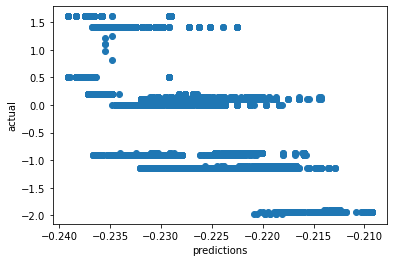

In [18]:
plt.scatter(y_pred, y_test)
plt.xlabel("predictions")
plt.ylabel("actual")

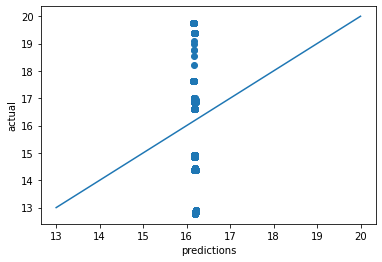

In [19]:
plt.scatter(yscaler.inverse_transform(y_pred),yscaler.inverse_transform(y_test))
plt.xlabel("predictions")
plt.ylabel("actual")
plt.plot([13, 20], [13, 20])
